In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import os


from analysis_utils import get_df, inspect_model_by_name, compare_two_models

In [2]:
import warnings
warnings.filterwarnings('error')
warnings.filterwarnings("ignore", category=DeprecationWarning)

identifier = '*'
df = get_df(identifier)
print('before filtering, there are a total of', len(df), 'models')

before filtering, there are a total of 771 models


In [51]:
len_df = len(df)

In [6]:
df['input_channel'] = df['input_channel'].fillna(value=2)


In [10]:
numeric_columns = [
    'use_pooling',
    'batch_norm',
    'data_noise_gaussian',
    'save_initial',
#     'momentum', # Momentum cannot be converteed because some are None
    'k',
    'data_is_target',
    'patience',
    'weight_decay',
    'batch_size',
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='raise')


In [11]:
consistent_cnr = df.query( \
    'target_anechoic_cyst_5mm_target_1_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_1_SNR_10dB_cnr_das & \
     target_anechoic_cyst_5mm_target_2_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_2_SNR_10dB_cnr_das & \
     target_anechoic_cyst_5mm_target_3_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_3_SNR_10dB_cnr_das & \
     target_anechoic_cyst_5mm_target_4_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_4_SNR_10dB_cnr_das & \
     target_anechoic_cyst_5mm_target_5_SNR_10dB_cnr_dnn > target_anechoic_cyst_5mm_target_5_SNR_10dB_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_1_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_1_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_2_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_2_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_3_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_3_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_4_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_4_cnr_das & \
     target_phantom_anechoic_cyst_2p5mm_target_5_cnr_dnn > target_phantom_anechoic_cyst_2p5mm_target_5_cnr_das & \
     target_in_vivo_target_17_cnr_dnn > target_in_vivo_target_17_cnr_das & \
     target_in_vivo_target_19_cnr_dnn > target_in_vivo_target_19_cnr_das')


In [12]:
consistent_cnr_sorted_by_cr = consistent_cnr.sort_values(by=['target_in_vivo_avg_cr_dnn'], ascending=False)

top_10_avg_cr = consistent_cnr_sorted_by_cr.head(10)

# for index, model_name in enumerate(top_10_avg_cr['name']):
#     model_folder = os.path.join('..', 'DNNs', model_name)
#     print('model', index+1, 'of', len(top_10_avg_cr), ': ', model_name)
#     inspect_model_by_name(model_folder, df)
#     print()

In [70]:
display(top_10_avg_cr)
display(list(top_10_avg_cr))

,input_channel,output_size,batch_norm,use_pooling,pooling_method,conv1_kernel_size,conv1_num_kernels,conv1_stride,conv1_dropout,pool1_kernel_size,...,target_phantom_anechoic_cyst_2p5mm_avg_snr_das,target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_mean_in_das,target_phantom_anechoic_cyst_2p5mm_avg_mean_in_dnn,target_phantom_anechoic_cyst_2p5mm_avg_mean_out_das,target_phantom_anechoic_cyst_2p5mm_avg_mean_out_dnn,target_phantom_anechoic_cyst_2p5mm_avg_var_in_das,target_phantom_anechoic_cyst_2p5mm_avg_var_in_dnn,target_phantom_anechoic_cyst_2p5mm_avg_var_out_das,target_phantom_anechoic_cyst_2p5mm_avg_var_out_dnn
142,2,130,0,1,max,23,14,1,0.0,3,...,1.94274,1.90072,0.006298,0.001657,0.041309,0.054057,0.000009,0.000004,0.000454,0.000817
127,2,130,0,1,max,15,22,1,0.0,3,...,1.94274,1.86716,0.006298,0.001878,0.041309,0.063684,0.000009,0.000004,0.000454,0.001217
259,2,130,1,0,max,17,50,1,0.0,3,...,1.94274,1.90264,0.006298,0.001290,0.041309,0.049370,0.000009,0.000003,0.000454,0.000679
411,2,130,1,0,max,7,23,1,0.0,3,...,1.94274,1.84966,0.006298,0.001491,0.041309,0.056165,0.000009,0.000003,0.000454,0.000940
578,2,130,1,1,max,7,8,1,0.0,3,...,1.94274,1.96134,0.006298,0.003152,0.041309,0.040992,0.000009,0.000008,0.000454,0.000436
445,2,130,1,1,max,18,46,1,0.0,2,...,1.94274,1.83082,0.006298,0.001360,0.041309,0.055499,0.000009,0.000003,0.000454,0.000929
405,2,130,0,0,max,17,24,1,0.0,3,...,1.94274,1.85410,0.006298,0.001962,0.041309,0.051523,0.000009,0.000004,0.000454,0.000784
69,1,130,1,1,max,24,30,1,0.0,3,...,1.94274,1.89982,0.006298,0.002120,0.041309,0.050362,0.000009,0.000004,0.000454,0.000712
41,1,130,1,1,max,31,19,1,0.0,2,...,1.94274,1.87734,0.006298,0.002216,0.041309,0.050928,0.000009,0.000005,0.000454,0.000740
11,2,130,1,1,max,30,50,1,0.0,2,...,1.94274,1.84786,0.006298,0.001873,0.041309,0.059783,0.000009,0.000003,0.000454,0.001070


['input_channel',
 'output_size',
 'batch_norm',
 'use_pooling',
 'pooling_method',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
 'conv1_dropout',
 'pool1_kernel_size',
 'pool1_stride',
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
 'pool2_kernel_size',
 'pool2_stride',
 'fcs_hidden_size',
 'fcs_num_hidden_layers',
 'fcs_dropout',
 'cost_function',
 'optimizer',
 'learning_rate',
 'momentum',
 'data_is_target',
 'data_train',
 'data_val',
 'batch_size',
 'data_noise_gaussian',
 'weight_decay',
 'patience',
 'cuda',
 'save_initial',
 'k',
 'save_dir',
 'name',
 'loss_val_k_3',
 'loss_val_k_4',
 'loss_val_k_5',
 'target_in_vivo_target_17_cr_das',
 'target_in_vivo_target_17_cr_dnn',
 'target_in_vivo_target_17_cnr_das',
 'target_in_vivo_target_17_cnr_dnn',
 'target_in_vivo_target_17_snr_das',
 'target_in_vivo_target_17_snr_dnn',
 'target_in_vivo_target_17_mean_in_das',
 'target_in_vivo_target_17_mean_in_dnn',
 'target_in_vivo_target_17_mean_

## Label df by top 10 or not

In [19]:
df.loc[df.index.isin(top_10_avg_cr.index), 'top_10'] = True
df.loc[~df.index.isin(top_10_avg_cr.index), 'top_10'] = False


In [28]:
top_10_mask = df['top_10'] == True

top_10 = df[top_10_mask]
not_top_10 = df[~top_10_mask]

num_top_10 = len(top_10)
num_not_top_10 = len(not_top_10)

print(num_top_10, num_not_top_10)


10 761


## Plotting Helpers

In [29]:
def top_10_vs_not_top_10_discrete(column, show_numbers=True):
    population_weights = df[column].value_counts(sort=False) / len(df)
    
    top_10_dist = top_10[column].value_counts(sort=False) / population_weights / num_top_10 / len(population_weights)
    top_10_dist = top_10_dist.fillna(value=0)
    
    not_top_10_dist = not_top_10[column].value_counts(sort=False) / population_weights / num_not_top_10 / len(population_weights)
    not_top_10_dist = not_top_10_dist.fillna(value=0)
    
#     fig, axis = plt.subplots(1, 1)
    
#     consistent_dist_max = consistent_dist.max()
#     inconsistent_dist_max = inconsistent_dist.max()
    
#     axis.set_xlim([])
    
    plt.bar(top_10_dist.index, top_10_dist.values, alpha=0.5, color='blue', label='top_10');
    
#     if show_numbers is True:
#         axis = plt.gca()
#         xmin, xmax = axis.get_xlim()
#         ymin, ymax = axis.get_ylim()
        
#         axis.set_xlim([xmin-0.25, xmax+0.25])
#         axis.set_ylim([ymin, ymax+0.25])
        
    if show_numbers is True:
        for i, v in enumerate(top_10_dist.values):
            plt.text(i, v, '{0:.2g}'.format(v), va='center', color='blue', fontweight='bold', fontsize=9) # .set_clip_on(True)
    
    plt.bar(not_top_10_dist.index, not_top_10_dist.values, alpha=0.5, color='red', label='not_top_10');
    
    if show_numbers is True:
        for i, v in enumerate(not_top_10_dist.values):
            plt.text(i, v, '{0:.2g}'.format(v), va='center', color='red', fontweight='bold', fontsize=9) # .set_clip_on(True)
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Normalized Percentage')
    plt.xlabel(column)
    
    


In [48]:
import numpy as np
def top_10_vs_not_top_10_continuous(column, bins=20, width=0.03):
    hist, bin_edges = np.histogram(df[column], bins=bins)
    weights = hist / len_df
    
#     print('weights =', weights)

    hist_top_10, bin_edges_top_10 = np.histogram(top_10[column], bins=bin_edges)
    hist_not_top_10, bin_edges_not_top_10 = np.histogram(not_top_10[column], bins=bin_edges)

    normalized_hist_top_10 = hist_top_10 / num_top_10 / weights / len(weights)
    normalized_hist_not_top_10 = hist_not_top_10 / num_not_top_10 / weights / len(weights)
    
    normalized_hist_top_10 = np.nan_to_num(normalized_hist_top_10) 
    normalized_hist_not_top_10 = np.nan_to_num(normalized_hist_not_top_10)   
#     normalized_hist_inconsistent.sum() # TODO: why is this not summing to 1?
#     normalized_hist_consistent.sum() # TODO: why is this not summing to 1?

    plt.bar(bin_edges_top_10[:-1], normalized_hist_top_10, width=width, color='blue', alpha=0.5, label='top_10');
    plt.bar(bin_edges_not_top_10[:-1], normalized_hist_not_top_10, width=width, color='red', alpha=0.5, label='not_top_10');
    
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend()
    
    
    


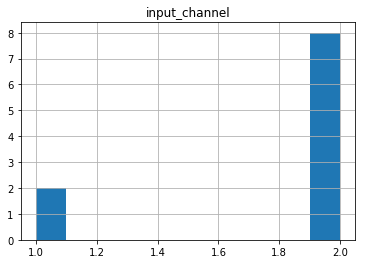

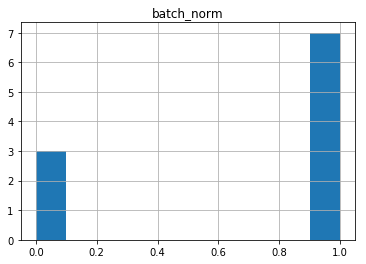

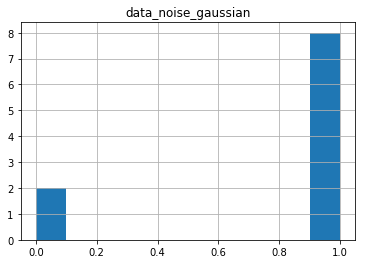

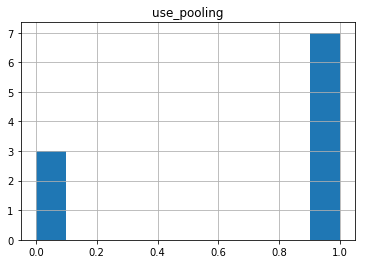

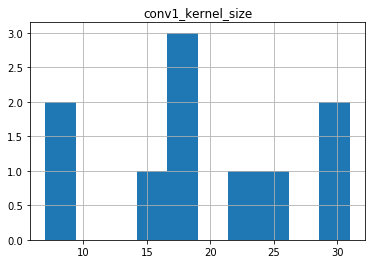

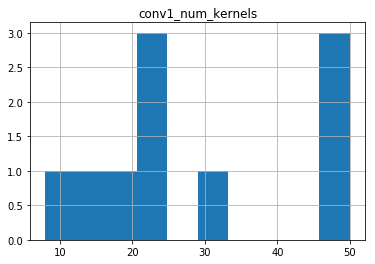

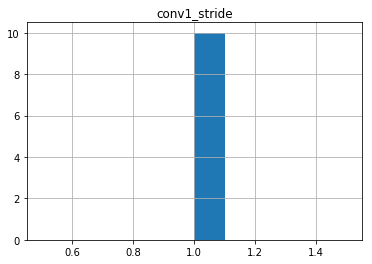

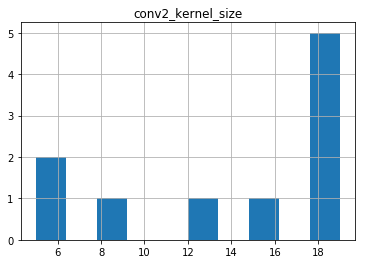

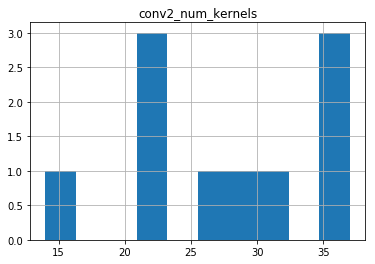

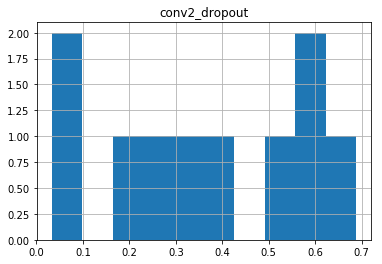

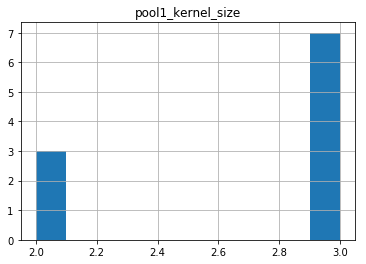

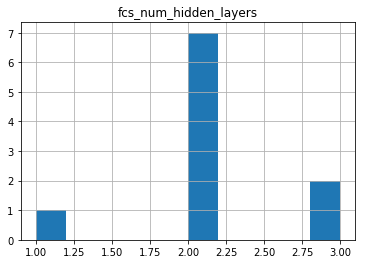

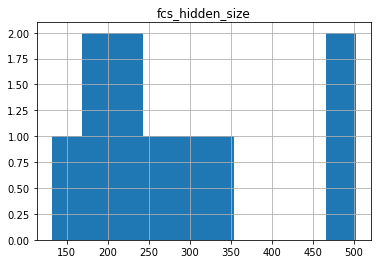

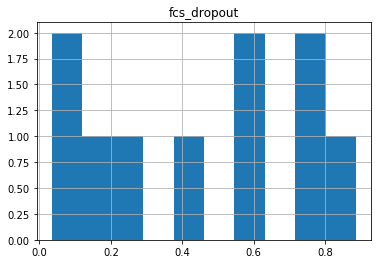

In [71]:
cols_of_interest = [
    'input_channel',
    'batch_norm',
    'data_noise_gaussian',
    'use_pooling',
    'conv1_kernel_size',
    'conv1_num_kernels',
    'conv1_stride',
    'conv2_kernel_size',
    'conv2_num_kernels',
    'conv2_dropout',
    'pool1_kernel_size',
    'fcs_num_hidden_layers',
    'fcs_hidden_size',
    'fcs_dropout',
    
    
]

for col_of_interest in cols_of_interest:
    plt.figure()
    top_10_avg_cr[col_of_interest].hist()
    plt.title(col_of_interest)

In [66]:
top_10_avg_cr['optimizer'].value_counts()


Adam    8
SGD     2
Name: optimizer, dtype: int64

In [67]:
top_10_avg_cr['cost_function'].value_counts()


SmoothL1    5
MSE         3
L1          2
Name: cost_function, dtype: int64

# Distribution of input_channel among top 10 vs non top 10 models

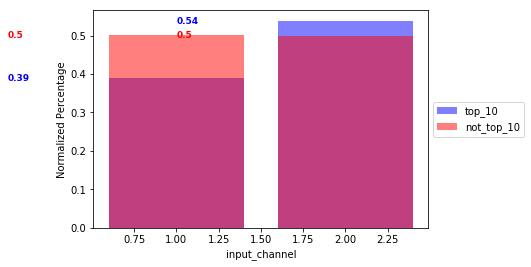

In [33]:
top_10_vs_not_top_10_discrete('input_channel')
# TODO: use two-bar bar graphs


# What percentage of consistent models use pooling?

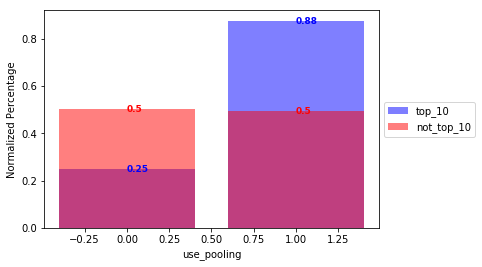

In [34]:
top_10_vs_not_top_10_discrete('use_pooling')

# What percentage of consistent vs inconsistent models use batch norm?

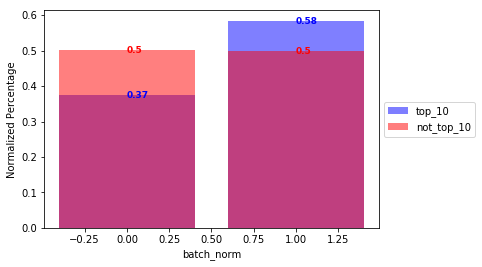

In [36]:
top_10_vs_not_top_10_discrete('batch_norm')

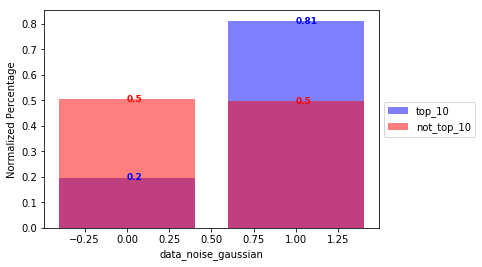

In [38]:
top_10_vs_not_top_10_discrete('data_noise_gaussian')

# Distribution of conv1_kernel_size among consistent vs inconsistent models

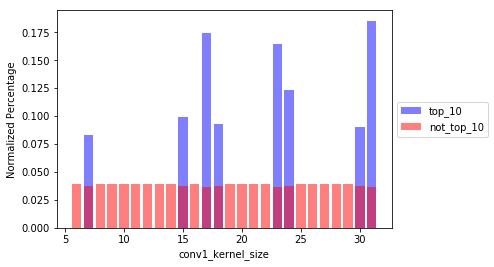

In [40]:
top_10_vs_not_top_10_discrete('conv1_kernel_size', show_numbers=False)

# Distribution of conv1_num_kernels among consistent vs inconsistent models

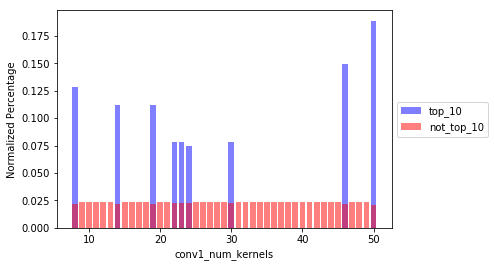

In [41]:
top_10_vs_not_top_10_discrete('conv1_num_kernels', show_numbers=False)

# Distribution of pool1_kernel_size among consistent vs inconsistent models

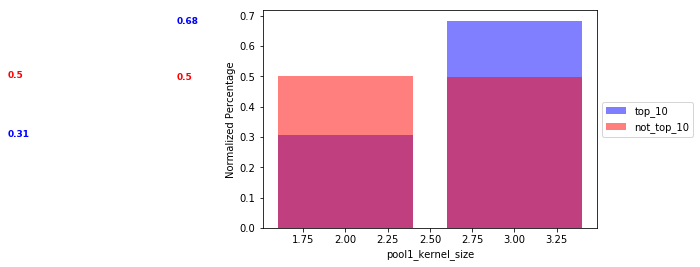

In [43]:
top_10_vs_not_top_10_discrete('pool1_kernel_size')

# Distribution of pool1_stride among consistent vs inconsistent models

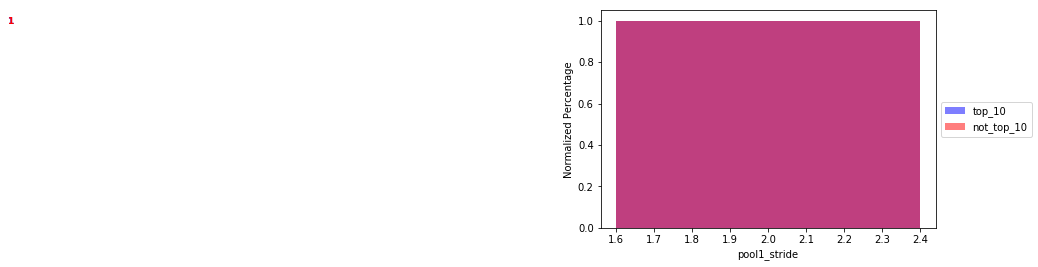

In [44]:
top_10_vs_not_top_10_discrete('pool1_stride')


# Distribution of conv2_kernel_size among consistent vs inconsistent models

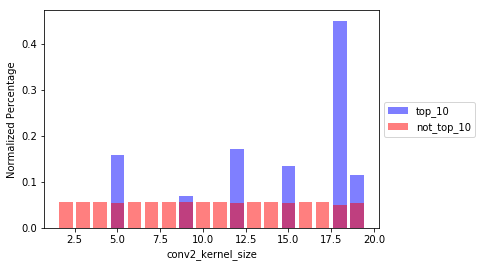

In [45]:
top_10_vs_not_top_10_discrete('conv2_kernel_size', show_numbers=False)


# Distribution of conv2_num_kernels among consistent vs inconsistent models

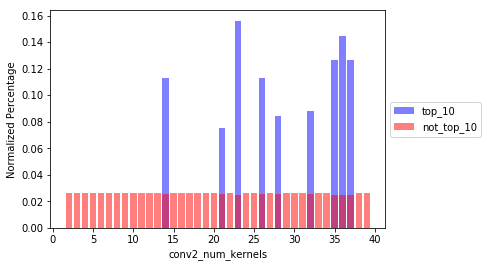

In [46]:
top_10_vs_not_top_10_discrete('conv2_num_kernels', show_numbers=False)


# Distribution of conv2_dropout among consistent vs inconsistent models

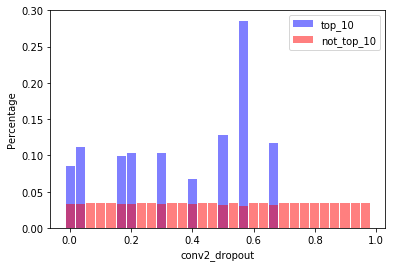

In [52]:
top_10_vs_not_top_10_continuous('conv2_dropout', bins=30)

# Distribution of fcs_hidden_size among consistent vs inconsistent models

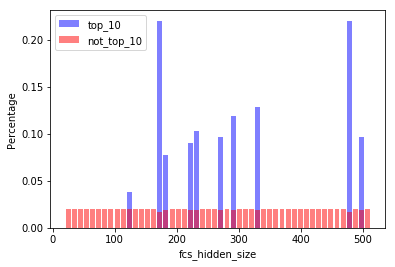

In [53]:
top_10_vs_not_top_10_continuous('fcs_hidden_size', bins=50, width=8)


# Distribution of fcs_dropout among consistent vs inconsistent models

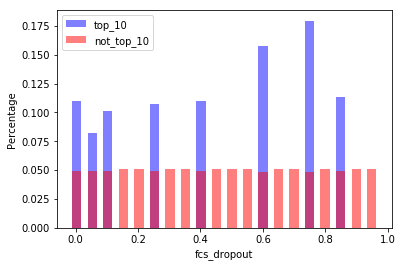

In [55]:
top_10_vs_not_top_10_continuous('fcs_dropout', bins=20)


# Distribution of fcs_num_hidden_layers among consistent vs inconsistent models

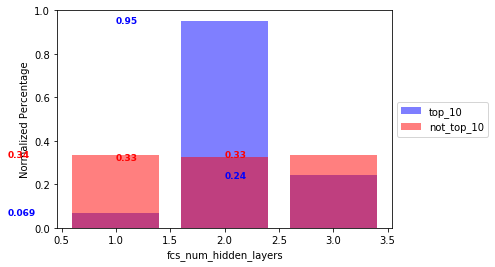

In [58]:
top_10_vs_not_top_10_discrete('fcs_num_hidden_layers')


# Optimizer

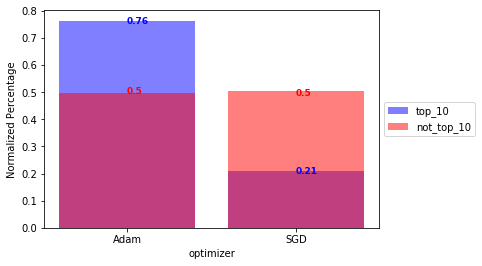

In [59]:
top_10_vs_not_top_10_discrete('optimizer')


# Cost/Loss Function

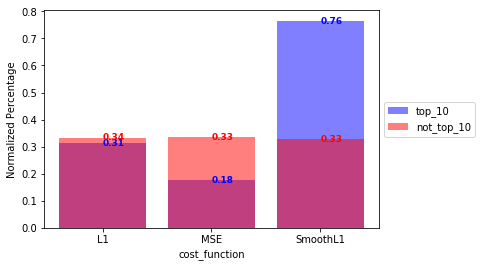

In [60]:
top_10_vs_not_top_10_discrete('cost_function')


# Distribution of loss_val_k_4

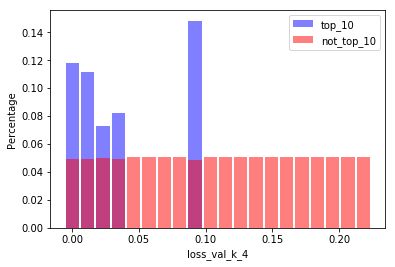

In [62]:
top_10_vs_not_top_10_continuous('loss_val_k_4', bins=20, width=0.01)
